In [4]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# WEB SCRAPING

In [5]:
name=[]
mileage=[]
dealer_name=[]
rating=[]
rating_count=[]
price=[]

for i in range(1,300):
    #website of a variable
    website='https://www.cars.com/shopping/results/?page='+ str(i) +'&page_size=20&list_price_max=&makes[]=&maximum_distance=all&models[]=&stock_type=used&zip='
    #requests
    response=requests.get(website)
    #soup object
    soup=BeautifulSoup(response.content,'html.parser')
    
    results= soup.find_all('div',{'class':"vehicle-details"})
    
    for result in results:
        try:
            name.append(result.find('h2').get_text())
        except:
            name.append("n/a")
        try:
            mileage.append(result.find('div',{"class":"mileage"}).get_text())
        except:
            mileage.append("n/a")
        try:
            rating.append(result.find('span',{"class":"sds-rating__count"}).get_text())
        except:
            rating.append("n/a")
        try:
            dealer_name.append(result.find('div',{"class":"dealer-name"}).get_text().strip())
        except:
            dealer_name.append("n/a")
        try:
            rating_count.append(result.find('span',{"class":"sds-rating__link"}).get_text())
        except:
            rating_count.append("n/a")
        try:
            price.append(result.find('span',{"class":"primary-price"}).get_text())
        except:
            price.append("n/a")
    
    

In [6]:
df=pd.DataFrame({"Name":name,"Mileage":mileage,"Dealer Name":dealer_name,"Rating":rating,"Rating Count":rating_count,"Price":price})

In [7]:
df

,Name,Mileage,Dealer Name,Rating,Rating Count,Price
0,2021 Land Rover Range Rover Westminster SWB,"4,800 mi.",n/a,n/a,n/a,"$110,978"
1,2020 Ford Mustang EcoBoost Premium,"49,526 mi.",Hertz Car Sales Jacksonville,4.9,(138 reviews),"$30,150"
2,2017 Lexus RX 350 F Sport,"66,610 mi.",Mac Haik Flowood,4.8,(625 reviews),"$39,900"
3,2019 Tesla Model X Long Range,"41,000 mi.",n/a,n/a,n/a,"$102,000"
4,2021 Jeep Wrangler Unlimited Sahara,"14,001 mi.",Sheehy Volkswagen of Springfield,4.8,(652 reviews),"$46,000"
...,...,...,...,...,...,...
5961,2019 BMW 330 i,"14,966 mi.",BMW of Henderson,4.4,(908 reviews),"$37,980"
5962,2016 Mercedes-Benz GLE-Class GLE 450 AMG Coupe...,"12,922 mi.",Manhattan Motorcars Inc.,4.8,(321 reviews),"$56,995"
5963,2009 Volkswagen Jetta S,"136,360 mi.",Blok Charity Auto Clearance,2.5,(41 reviews),"$5,300"
5964,2019 Acura ILX,"34,769 mi.",CarMax Columbus Sawmill - Now offering Curbsid...,2.5,(7 reviews),"$28,998"


# Checking null values

In [8]:
df.isnull().sum()

Name            0
Mileage         0
Dealer Name     0
Rating          0
Rating Count    0
Price           0
dtype: int64

so no null values are present here

In [9]:
df.columns

Index(['Name', 'Mileage', 'Dealer Name', 'Rating', 'Rating Count', 'Price'], dtype='object')

# DATA DESCRIPTIONS

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
cars are in demand hence making them costly and some are not in demand hence cheaper. One 
of our clients works with small traders, who sell used cars. With the change in market due to covid 
19 impact, our client is facing problems with their previous car price valuation machine learning 
models. So, they are looking for new machine learning models from new data. We have to make 
car price valuation model.

The dataset contains the used car data . On the basis of the data the target column is "Price".......The dataset contain data like 'Name','Mileage','Dealer Name','Rating','Rating Count'

# Import Library

In [14]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [15]:
import numpy as np

In [16]:
df['Price'].unique()

array(['$110,978', '$30,150', '$39,900', ..., '$39,332', '$37,980',
       '$5,300'], dtype=object)

In [17]:
df.loc[df['Price']== " "]

,Name,Mileage,Dealer Name,Rating,Rating Count,Price


# EDA

In [20]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [21]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [22]:
df

,Name,Mileage,Dealer Name,Rating,Rating Count,Price
0,1862.0,3708.0,3193.0,39.0,1502.0,48.0
1,1442.0,4475.0,1458.0,37.0,455.0,1055.0
2,586.0,5075.0,1961.0,36.0,1200.0,2088.0
3,1272.0,3772.0,3193.0,39.0,1502.0,13.0
4,1839.0,739.0,2724.0,36.0,1220.0,2588.0
...,...,...,...,...,...,...
5961,934.0,901.0,404.0,32.0,1444.0,1891.0
5962,433.0,509.0,1975.0,36.0,859.0,3157.0
5963,69.0,735.0,529.0,13.0,976.0,2824.0
5964,893.0,3234.0,673.0,13.0,1261.0,922.0


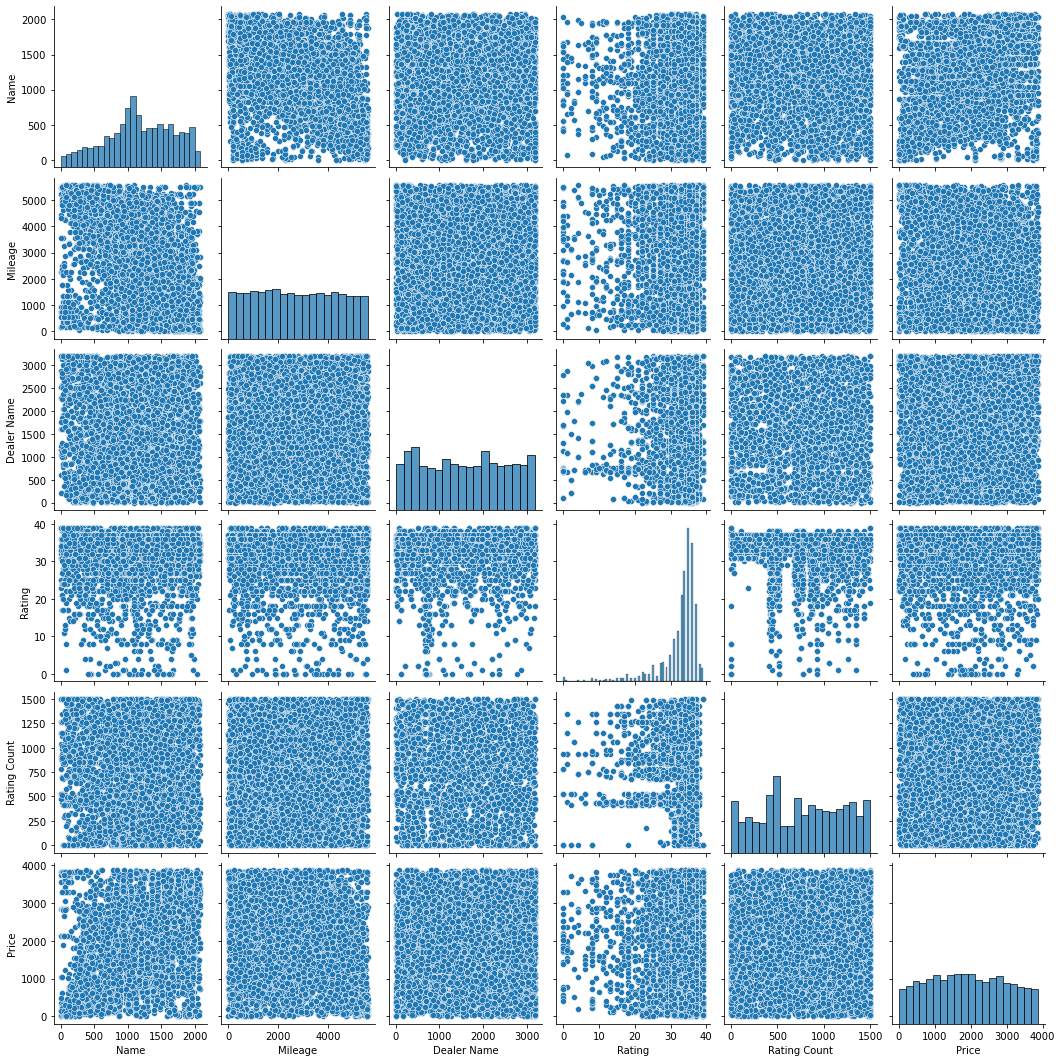

In [23]:
sns.pairplot(df)

# Histplot

<AxesSubplot:ylabel='Frequency'>

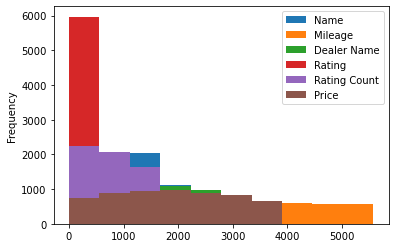

In [24]:
df.plot(kind="hist")

# CORRELATION

In [25]:
df.corr()

,Name,Mileage,Dealer Name,Rating,Rating Count,Price
Name,1.000000,-0.468553,0.056336,0.064736,-0.018266,0.353059
Mileage,-0.468553,1.000000,-0.004903,-0.051438,0.024427,-0.258385
Dealer Name,0.056336,-0.004903,1.000000,0.092068,0.008231,-0.013372
Rating,0.064736,-0.051438,0.092068,1.000000,-0.022477,-0.000882
Rating Count,-0.018266,0.024427,0.008231,-0.022477,1.000000,-0.008842
Price,0.353059,-0.258385,-0.013372,-0.000882,-0.008842,1.000000


<AxesSubplot:>

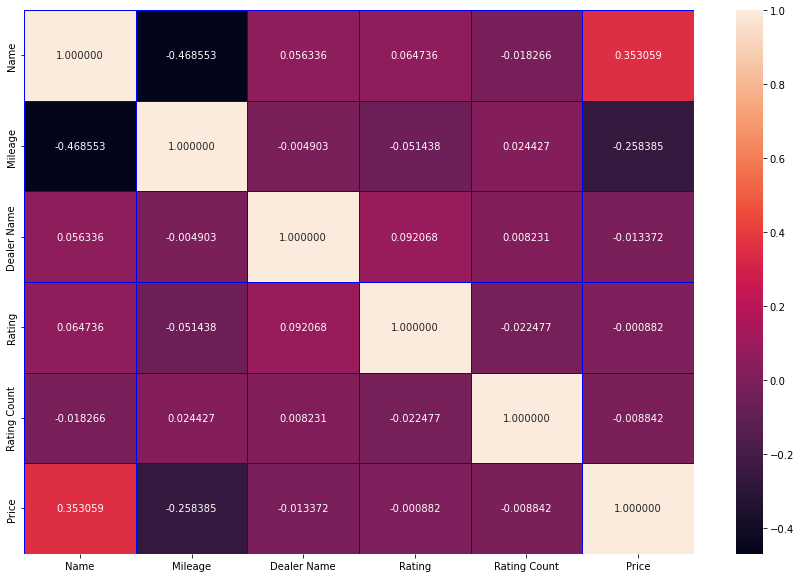

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="blue",fmt='2f')

# Observation:

Name is strongly correlated


Mileage is nagetively correlated


Dealer Name, Rating and Ratiing Count are very weakly correlated.

# Describing dataset

In [27]:
df.describe()

,Name,Mileage,Dealer Name,Rating,Rating Count,Price
count,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000
mean,1164.044754,2740.826349,1580.052967,32.333389,769.539390,1908.219075
std,505.819223,1602.739066,941.006993,6.009463,433.868391,1062.422608
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,834.000000,1361.250000,728.250000,31.000000,433.000000,1034.250000
50%,1158.500000,2706.500000,1582.000000,34.000000,764.500000,1896.000000
75%,1577.000000,4128.750000,2380.000000,36.000000,1149.000000,2789.750000
max,2080.000000,5573.000000,3194.000000,39.000000,1502.000000,3866.000000


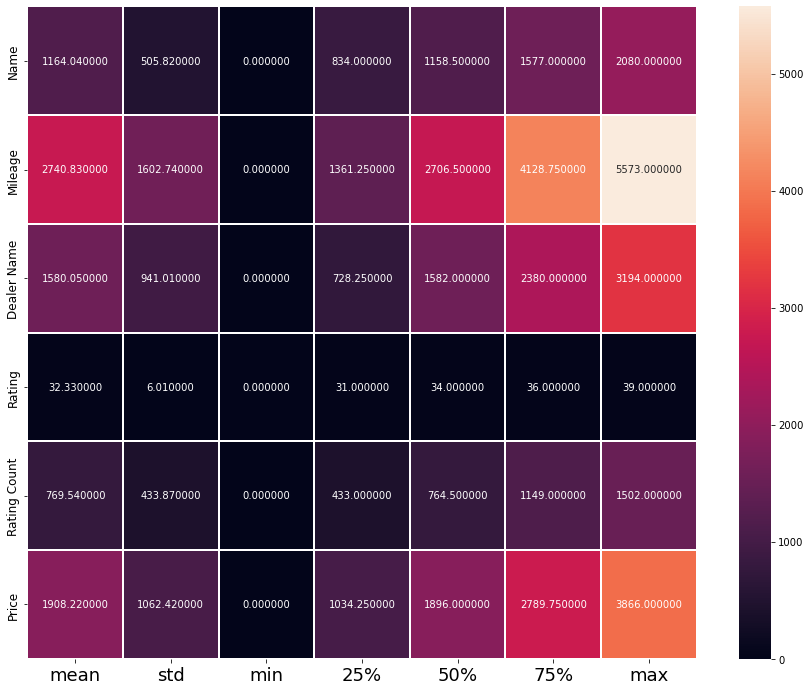

In [28]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12) 
plt.show()

# Distribition curve

In [29]:
from sklearn.preprocessing import LabelEncoder
for column in df:
    if df[column].dtypes == 'object':
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])

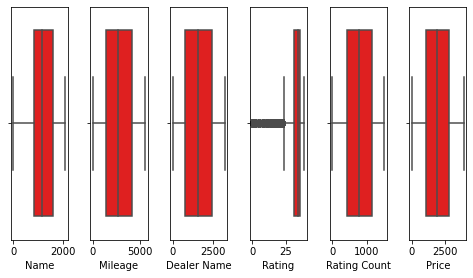

In [30]:
colist=df.columns.values
graph=1
plt.figure(figsize=(10,15))
for i in range(0, len(colist)):
    plt.subplot(4,9,graph)
    sns.boxplot(df[colist[i]],color='red',orient='h')
    graph+=1
    plt.tight_layout()

We have seen data are normally distributed ......and some outlayers are present in the data.

# The outlayer removal

In [31]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(5966, 6)

In [32]:
threshold=3 #rule of thumb
print(np.where(z>3))

(array([  48,   87,   88,  104,  126,  173,  201,  212,  237,  289,  320,
        334,  366,  371,  406,  470,  510,  554,  557,  611,  662,  692,
        790,  827,  837,  855,  913,  964,  969, 1118, 1258, 1263, 1275,
       1359, 1362, 1380, 1396, 1420, 1428, 1445, 1458, 1481, 1500, 1514,
       1563, 1641, 1724, 1791, 1809, 1821, 1830, 1874, 1911, 1929, 1934,
       1981, 1995, 2011, 2041, 2066, 2079, 2097, 2119, 2152, 2171, 2175,
       2194, 2195, 2229, 2245, 2285, 2298, 2417, 2418, 2427, 2434, 2491,
       2540, 2564, 2684, 2697, 2731, 2785, 2811, 2841, 2869, 2880, 2948,
       2967, 3002, 3011, 3058, 3105, 3118, 3158, 3179, 3212, 3230, 3261,
       3419, 3545, 3564, 3595, 3643, 3652, 3765, 3788, 3891, 3903, 3913,
       3925, 3950, 4093, 4155, 4159, 4233, 4360, 4371, 4378, 4477, 4527,
       4569, 4588, 4687, 4726, 4749, 4794, 4820, 4823, 4838, 4850, 4878,
       4927, 4967, 5010, 5052, 5098, 5207, 5237, 5264, 5297, 5383, 5430,
       5465, 5483, 5574, 5579, 5581, 5614, 5642, 5

In [33]:
len(np.where(z>3)[0])

158

In [34]:
z.iloc[48]

Name            1.447367
Mileage         1.446504
Dealer Name     0.651428
Rating          4.715191
Rating Count    0.372173
Price           0.825747
Name: 48, dtype: float64

In [35]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Name,Mileage,Dealer Name,Rating,Rating Count,Price
0,1862.0,3708.0,3193.0,39.0,1502.0,48.0
1,1442.0,4475.0,1458.0,37.0,455.0,1055.0
2,586.0,5075.0,1961.0,36.0,1200.0,2088.0
3,1272.0,3772.0,3193.0,39.0,1502.0,13.0
4,1839.0,739.0,2724.0,36.0,1220.0,2588.0
...,...,...,...,...,...,...
5959,1058.0,453.0,363.0,37.0,773.0,1164.0
5960,1429.0,4664.0,1035.0,32.0,901.0,2025.0
5961,934.0,901.0,404.0,32.0,1444.0,1891.0
5962,433.0,509.0,1975.0,36.0,859.0,3157.0


In [36]:
df.shape

(5966, 6)

# Data loss

In [37]:
(5966-5808)/5966*100

2.6483405967147164

2.64% data has been removed

# SKEWNESS¶

In [38]:
df.skew()

Name           -0.233162
Mileage         0.038750
Dealer Name     0.023942
Rating         -2.634548
Rating Count   -0.042672
Price           0.037226
dtype: float64

In [39]:
x=df_new_z.iloc[:,:-1]
#target
y=df_new_z.iloc[:,-1]

In [40]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.37580242,  0.64793292,  1.51313696,  2.42023301,  1.51878778],
       [ 0.54638646,  1.04276355, -0.02199758,  1.28326319, -0.64263922],
       [-1.14494019,  1.33692794,  0.46410921,  0.80767055,  0.95711387],
       ...,
       [-0.45715704, -1.13274795, -1.28450987, -0.59675552,  1.41347283],
       [-1.4474502 , -1.48455159,  0.47703329,  0.80767055,  0.27415261],
       [ 0.54243631,  1.27803871,  0.47795533,  0.80767055, -1.3679284 ]])

# StandardScaler

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.37580242,  0.64793292,  1.51313696,  2.42023301,  1.51878778],
       [ 0.54638646,  1.04276355, -0.02199758,  1.28326319, -0.64263922],
       [-1.14494019,  1.33692794,  0.46410921,  0.80767055,  0.95711387],
       ...,
       [-0.45715704, -1.13274795, -1.28450987, -0.59675552,  1.41347283],
       [-1.4474502 , -1.48455159,  0.47703329,  0.80767055,  0.27415261],
       [ 0.54243631,  1.27803871,  0.47795533,  0.80767055, -1.3679284 ]])

# Separating the columns into feature and target

In [43]:
features=df.drop("Price",axis=1)
target=df["Price"]

In [44]:
features.columns

Index(['Name', 'Mileage', 'Dealer Name', 'Rating', 'Rating Count'], dtype='object')

In [45]:
target

0         48.0
1       1055.0
2       2088.0
3         13.0
4       2588.0
         ...  
5961    1891.0
5962    3157.0
5963    2824.0
5964     922.0
5965     442.0
Name: Price, Length: 5966, dtype: float64

# VIF

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
def calc_vif():
    vif=pd.DataFrame()
    vif["variables"]=features.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(features.values,i) for i in range(features.shape[1])]
    print(vif)

In [48]:
calc_vif()

      variables  VIF FACTOR
0          Name    6.403064
1       Mileage    3.970027
2   Dealer Name    3.789311
3        Rating   13.302773
4  Rating Count    3.858304


We have seen that in the Rating there some multicollinearity is present

In [49]:
features=df.drop("Rating",axis=1)

# Let's training the model

In [50]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state{i},the training accuracy is :- {r2_score(target_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is :- {r2_score(target_test,pred_test)}")
    print("\n")    
    

At random state0,the training accuracy is :- 1.0
At random state0,the testing accuracy is :- 1.0


At random state1,the training accuracy is :- 1.0
At random state1,the testing accuracy is :- 1.0


At random state2,the training accuracy is :- 1.0
At random state2,the testing accuracy is :- 1.0


At random state3,the training accuracy is :- 1.0
At random state3,the testing accuracy is :- 1.0


At random state4,the training accuracy is :- 1.0
At random state4,the testing accuracy is :- 1.0


At random state5,the training accuracy is :- 1.0
At random state5,the testing accuracy is :- 1.0


At random state6,the training accuracy is :- 1.0
At random state6,the testing accuracy is :- 1.0


At random state7,the training accuracy is :- 1.0
At random state7,the testing accuracy is :- 1.0


At random state8,the training accuracy is :- 1.0
At random state8,the testing accuracy is :- 1.0


At random state9,the training accuracy is :- 1.0
At random state9,the testing accuracy is :- 1.0


At random 

At random state85,the training accuracy is :- 1.0
At random state85,the testing accuracy is :- 1.0


At random state86,the training accuracy is :- 1.0
At random state86,the testing accuracy is :- 1.0


At random state87,the training accuracy is :- 1.0
At random state87,the testing accuracy is :- 1.0


At random state88,the training accuracy is :- 1.0
At random state88,the testing accuracy is :- 1.0


At random state89,the training accuracy is :- 1.0
At random state89,the testing accuracy is :- 1.0


At random state90,the training accuracy is :- 1.0
At random state90,the testing accuracy is :- 1.0


At random state91,the training accuracy is :- 1.0
At random state91,the testing accuracy is :- 1.0


At random state92,the training accuracy is :- 1.0
At random state92,the testing accuracy is :- 1.0


At random state93,the training accuracy is :- 1.0
At random state93,the testing accuracy is :- 1.0


At random state94,the training accuracy is :- 1.0
At random state94,the testing accuracy is

In [53]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [54]:
lr.fit(features_train,target_train)

LinearRegression()

In [55]:
pred_test=lr.predict(features_test)

In [56]:
print(r2_score(target_test,pred_test))

1.0


# CV of the model

In [57]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"at cross fold{j} the cross score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing{Test_accuracy}")
    print("\n")

at cross fold2 the cross score is 1.0 and accuracy score for training is -1.0094700599706834 and accuracy score for testing1.0


at cross fold3 the cross score is 1.0 and accuracy score for training is -1.0094700599706834 and accuracy score for testing1.0


at cross fold4 the cross score is 1.0 and accuracy score for training is -1.0094700599706834 and accuracy score for testing1.0


at cross fold5 the cross score is 1.0 and accuracy score for training is -1.0094700599706834 and accuracy score for testing1.0


at cross fold6 the cross score is 1.0 and accuracy score for training is -1.0094700599706834 and accuracy score for testing1.0


at cross fold7 the cross score is 1.0 and accuracy score for training is -1.0094700599706834 and accuracy score for testing1.0


at cross fold8 the cross score is 1.0 and accuracy score for training is -1.0094700599706834 and accuracy score for testing1.0


at cross fold9 the cross score is 1.0 and accuracy score for training is -1.0094700599706834 and 

# Hyperparameter tuning

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [60]:
from sklearn.linear_model import Lasso
parameters={'alpha':[0.0001,0.001,0.01,0.1,10],'random_state':list(range(0,10))}

In [61]:
ls=Lasso()
clif=GridSearchCV(ls,parameters)
clif.fit(features_train,target_train)
print(clif.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [62]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
lss=r2_score(target_test,pred_ls)
lss

0.9999999999822292

In [63]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9999999999839304

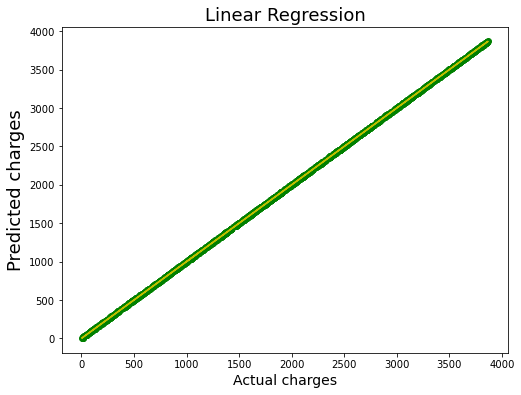

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='g')
plt.plot(target_test,target_test,color='y')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=18)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Esamble technique¶

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()
parameters={'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]}
rf=RandomForestRegressor
clf=GridSearchCV(estimator, parameters, n_jobs=-1, cv=5)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 500, 'random_state': 18}


In [67]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)
rfs=r2_score(target_test,pred_decision)
print("R2 score:",rfs*100)
rfscore=cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()
print("Cross_val_score:",rfc*100)

R2 score: 99.99995307764598
Cross_val_score: 99.99995168242371


# okay so my model is performing 99.99% well

# Model Saving¶

In [68]:
import pickle
filename='Car.pkl'
pickle.dump(rf,open(filename,'wb'))

In [69]:
loaded_model=pickle.load(open('Car.pkl','rb'))
results=loaded_model.score(features_test,target_test)

In [70]:
results

0.9999995307764599

# conclusion

In [71]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=['Predicted','Orginal'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193
Predicted,1005.87,2251.27,1156.67,154.24,2948.58,1478.23,3795.36,2822.03,3159.26,307.52,...,2454.08,573.39,1901.2,3198.27,1353.09,259.58,2072.47,827.2,1984.91,1102.47
Orginal,1005.87,2251.27,1156.67,154.24,2948.58,1478.23,3795.36,2822.03,3159.26,307.52,...,2454.08,573.39,1901.2,3198.27,1353.09,259.58,2072.47,827.2,1984.91,1102.47
